# Aprendizaje no supervisado

## 1. Librerias y Datos

In [1]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

# Useful functions
from src.utils import load_examples, plot_scatter, plot_silhouette

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data.csv')
data['stays_nights']=data.stays_in_weekend_nights+data.stays_in_week_nights
data=data.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)
data.describe()

Unnamed: 0   is_canceled     lead_time  arrival_date_year  \
count  30000.000000  30000.000000  30000.000000       30000.000000   
mean   14999.500000      0.368367      8.280793        2016.156167   
std     8660.398374      0.482370      2.027570           0.706490   
min        0.000000      0.000000      0.763433        2015.000000   
25%     7499.750000      0.000000      7.664083        2016.000000   
50%    14999.500000      0.000000      8.326678        2016.000000   
75%    22499.250000      1.000000      9.003887        2017.000000   
max    29999.000000      1.000000     17.690502        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month        adults  \
count              30000.000000               30000.000000  30000.000000   
mean                  27.144700                  15.785733      1.863632   
std                   13.649126                   8.800606      0.635565   
min                    1.000000                   1.000000      1.000000   
25%                   16.000000                   8.000000      2.000000   
50%                   27.000000                  16.000000      2.000000   
75%                   38.000000                  23.000000      2.000000   
max                   53.000000                  31.000000     55.000000   

           children        babies  is_repeated_guest  ...       meal_FB  \
count  30000.000000  30000.000000       30000.000000  ...  30000.000000   
mean       0.106705      0.007900           0.032400  ...      0.006100   
std        0.403716      0.105062           0.177063  ...      0.077865   
min        0.000000      0.000000           0.000000  ...      0.000000   
25%        0.000000      0.000000           0.000000  ...      0.000000   
50%        0.000000      0.000000           0.000000  ...      0.000000   
75%        0.000000      0.000000           0.000000  ...      0.000000   
max        3.000000     10.000000           1.000000  ...      1.000000   

            meal_HB       meal_SC  meal_Undefined  deposit_type_Non Refund  \
count  30000.000000  30000.000000    30000.000000             30000.000000   
mean       0.122200      0.090733        0.009367                 0.120433   
std        0.327522      0.287234        0.096329                 0.325473   
min        0.000000      0.000000        0.000000                 0.000000   
25%        0.000000      0.000000        0.000000                 0.000000   
50%        0.000000      0.000000        0.000000                 0.000000   
75%        0.000000      0.000000        0.000000                 0.000000   
max        1.000000      1.000000        1.000000                 1.000000   

       deposit_type_Refundable  reserverd/assigned  customer_type_Group  \
count             30000.000000        30000.000000         30000.000000   
mean                  0.001200            0.872467             0.004733   
std                   0.034621            0.333575             0.068637   
min                   0.000000            0.000000             0.000000   
25%                   0.000000            1.000000             0.000000   
50%                   0.000000            1.000000             0.000000   
75%                   0.000000            1.000000             0.000000   
max                   1.000000            1.000000             1.000000   

       customer_type_Transient-Party  stays_nights  
count                   30000.000000  30000.000000  
mean                        0.960500      3.440500  
std                         0.194785      2.593791  
min                         0.000000      0.000000  
25%                         1.000000      2.000000  
50%                         1.000000      3.000000  
75%                         1.000000      4.000000  
max                         1.000000     69.000000  

[8 rows x 29 columns]

## 2. K-means

Lo vamos a separar en dos partes:
1. Primero vamos a usar como objetivo la variabla is_canceled, por lo que vamos a intentar clasificar nuestros datos en dos clusters y ver el resultado.

2. Despúes vamos a ver cual es el número más óptimo de clusters utilizando como objetivo la variable stays_nights, para entonces ver si tiene sentido separar esa variable en varias subclases en función del número de clusters 

### Variable Objetivo: is_canceled

Vamos a normalizar los datos y usar dos clusters para intentar clasificar en función de los dos valores de nuestra variable objetivo:

In [3]:
X = data.drop(['is_canceled', 'Unnamed: 0'], axis=1).values
Y = data.is_canceled

In [4]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

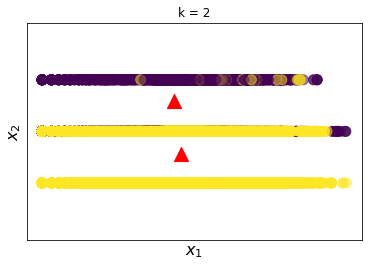

In [10]:
# build the clustering model
k = 2
kmeans = KMeans(n_clusters = k)
kmeans.fit(Xs)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(Xs,'k = ' + str(k), cluster_labels, centroids)
plt.show()

In [11]:
kmeans.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [12]:
Y

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
29995    0.0
29996    0.0
29997    0.0
29998    1.0
29999    0.0
Name: is_canceled, Length: 30000, dtype: float64

In [13]:
k = 2
kmeans = KMeans(n_clusters=k).fit(X)
kmeans.inertia_

12556176.141185042

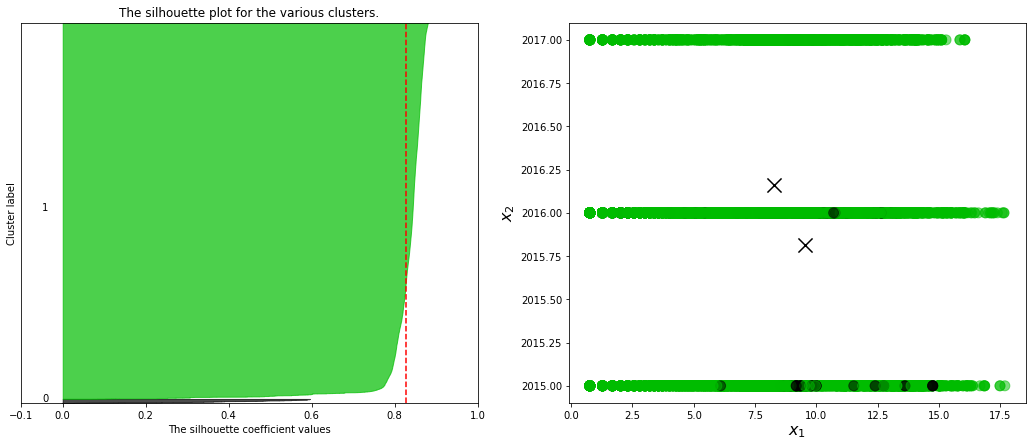

In [14]:
k = 2
kmeans = KMeans(n_clusters=k).fit(X)
plot_silhouette(X,k,kmeans.labels_,kmeans.cluster_centers_)

Se puede ver que no funciona muy bien, ya que obtenemos un inertia muy alto y casi todos los datos pertenecen al mismo grupo.

### Variable Objetivo: stays_nights
Normalizamos los datos y aplicamos TSNE para ver los datos en dos dimensiones:

In [86]:
X = data.drop(['stays_nights', 'Unnamed: 0'], axis=1).values
Y = data.stays_nights

In [87]:
columns = data.drop(['stays_nights', 'Unnamed: 0'], axis=1).columns

In [88]:
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

Aplicamos TSNE para ver una representación de los datos:

In [90]:
from sklearn.manifold import TSNE

Xs = TSNE(n_components=2, random_state=0).fit_transform(Xs)

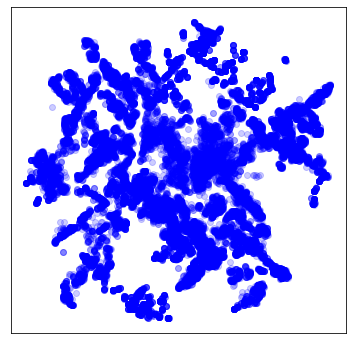

In [91]:
plt.figure(figsize=(6, 6))
plt.scatter(Xs[:, 0], X_tsne[:, 1], c = 'b', marker='o', alpha=0.2)
plt.xticks([])
plt.yticks([])
plt.show();

Se pueden ver varios grupos grandes, pero hay muchos más de 2, que son los distintos valores de nuestra variable objetivo

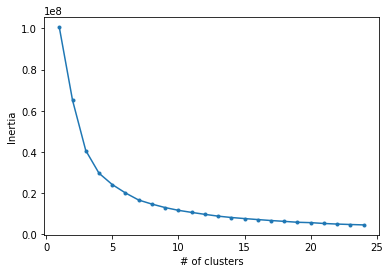

In [92]:
K = range(1,25)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(Xs)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

Aunque no queda un número muy claro, vamos a seleccionar K=10.

Vamos a ver las dimensiones de los distintos clusters y las distancias que hay en cada uno de ellos:

Cluster sizes k-means: [2703 2839 3402 3599 2516 2619 2925 2629 3241 3527]
Cluster distances k-means: [226856640.0, 210575380.0, 194574500.0, 115578720.0, 220814020.0, 232305600.0, 204170290.0, 223864460.0, 202523360.0, 108992180.0]


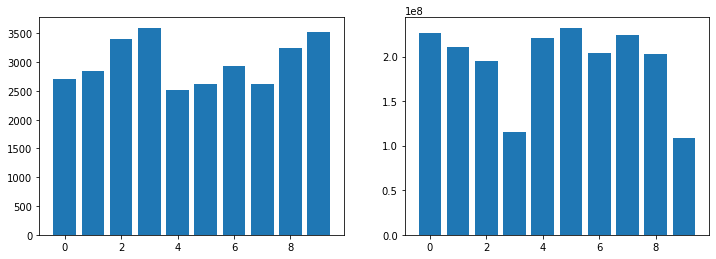

In [93]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
labels_km = kmeans.fit_predict(Xs)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum( np.sum((Xs - c) ** 2, axis=1) ) 
    distances.append(d.round(2))
    
print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

Podemos ver que en los clusters con más elementos, son en los que estos están más centrados.

In [94]:
def close_to_far_from_center(x,centroid, n=5):
    
    distance = np.sum((x - centroid) ** 2, axis=1)
    
    print('Close to center')
    display(pd.DataFrame(X[np.argsort(distance)[:n]], columns= columns))
    
    print('Far from center')
    display(pd.DataFrame(X[np.argsort(distance)[-n:]], columns= columns))

In [95]:
close_to_far_from_center(Xs,kmeans.cluster_centers_[9])

Close to center


is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0          0.0  16.865000             2015.0                      31.0   
1          0.0  13.879038             2015.0                      43.0   
2          0.0  13.183459             2015.0                      43.0   
3          0.0  15.975893             2015.0                      37.0   
4          0.0  13.863309             2015.0                      43.0   

   arrival_date_day_of_month  adults  children  babies  is_repeated_guest  \
0                        1.0     2.0       0.0     0.0                0.0   
1                       19.0     2.0       0.0     0.0                0.0   
2                       19.0     2.0       0.0     0.0                0.0   
3                        7.0     2.0       0.0     0.0                0.0   
4                       19.0     2.0       0.0     0.0                0.0   

   previous_cancellations  ...  hotel_Resort Hotel  meal_FB  meal_HB  meal_SC  \
0                     0.0  ...                 1.0      0.0      1.0      0.0   
1                     0.0  ...                 1.0      0.0      1.0      0.0   
2                     0.0  ...                 1.0      0.0      1.0      0.0   
3                     0.0  ...                 1.0      0.0      1.0      0.0   
4                     0.0  ...                 1.0      0.0      1.0      0.0   

   meal_Undefined  deposit_type_Non Refund  deposit_type_Refundable  \
0             0.0                      0.0                      0.0   
1             0.0                      0.0                      0.0   
2             0.0                      0.0                      0.0   
3             0.0                      0.0                      0.0   
4             0.0                      0.0                      0.0   

   reserverd/assigned  customer_type_Group  customer_type_Transient-Party  
0                 1.0                  0.0                            1.0  
1                 1.0                  0.0                            1.0  
2                 1.0                  0.0                            1.0  
3                 1.0                  0.0                            1.0  
4                 1.0                  0.0                            1.0  

[5 rows x 27 columns]

Far from center


is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0          0.0  12.221072             2016.0                      37.0   
1          1.0   9.021188             2017.0                      31.0   
2          0.0  10.495700             2016.0                      42.0   
3          0.0  10.495700             2016.0                      42.0   
4          0.0   4.646389             2016.0                      42.0   

   arrival_date_day_of_month  adults  children  babies  is_repeated_guest  \
0                        5.0     2.0       0.0     0.0                0.0   
1                        1.0     2.0       1.0     0.0                0.0   
2                       11.0     2.0       0.0     0.0                0.0   
3                       11.0     1.0       0.0     0.0                0.0   
4                       11.0     1.0       0.0     0.0                0.0   

   previous_cancellations  ...  hotel_Resort Hotel  meal_FB  meal_HB  meal_SC  \
0                     0.0  ...                 1.0      0.0      0.0      0.0   
1                     0.0  ...                 0.0      0.0      1.0      0.0   
2                     0.0  ...                 1.0      0.0      0.0      0.0   
3                     0.0  ...                 1.0      0.0      0.0      0.0   
4                     0.0  ...                 1.0      0.0      0.0      0.0   

   meal_Undefined  deposit_type_Non Refund  deposit_type_Refundable  \
0             0.0                      0.0                      1.0   
1             0.0                      0.0                      1.0   
2             0.0                      0.0                      1.0   
3             0.0                      0.0                      1.0   
4             0.0                      0.0                      1.0   

   reserverd/assigned  customer_type_Group  customer_type_Transient-Party  
0                 1.0                  0.0                            1.0  
1                 1.0                  0.0                            1.0  
2                 1.0                  0.0                            1.0  
3                 1.0                  0.0                            1.0  
4                 1.0                  0.0                            1.0  

[5 rows x 27 columns]

Como podemos ver, los datos más cercanos son bastante parecidos.

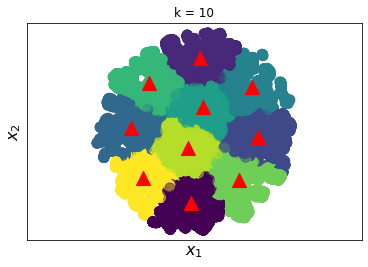

In [96]:
# build the clustering model
k = 10
kmeans = KMeans(n_clusters = k)
kmeans.fit(Xs)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(Xs,'k = ' + str(k), cluster_labels, centroids)
plt.show()

In [102]:
Y_predicted = kmeans.predict(Xs)
Y_predicted

array([3, 7, 8, ..., 3, 8, 1], dtype=int32)

In [103]:
Y

0        7.0
1        2.0
2        2.0
3        4.0
4        2.0
        ... 
29995    4.0
29996    1.0
29997    2.0
29998    3.0
29999    2.0
Name: stays_nights, Length: 30000, dtype: float64

In [104]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y, Y_predicted, squared=False)
rms

3.8696640681072045

Vemos que tiene un RMSE alto para el rango en el que se mueve nuestra variable objetivo (es un poco mayor que la media).

In [99]:
k = 10
kmeans = KMeans(n_clusters=k).fit(Xs)
kmeans.inertia_

11711969.0

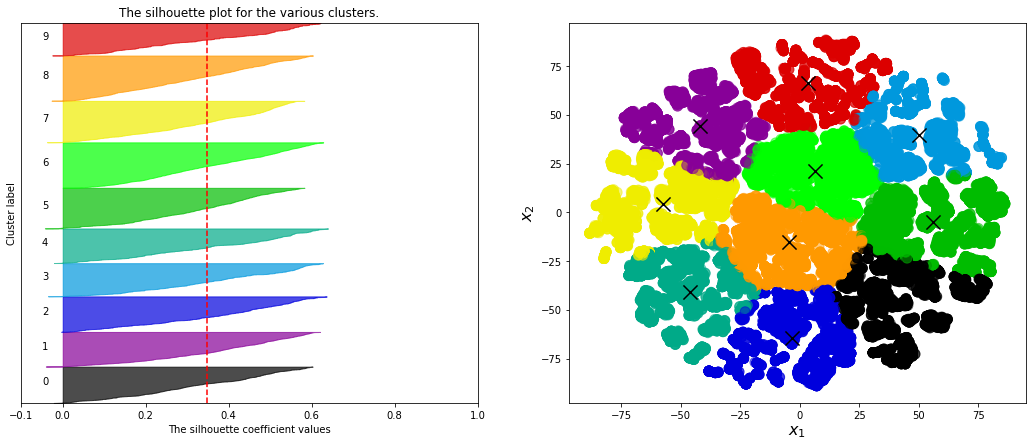

In [100]:
k = 10
kmeans = KMeans(n_clusters=k).fit(Xs)
plot_silhouette(Xs,k,kmeans.labels_,kmeans.cluster_centers_)

## DB-SCAN
Vamos a probar DB-SCAN con distintos valores de eps y siempre min_samples=10

### Variable Objetivo: is_canceled

Vamos a normalizar los datos y aplicamos DB-SCAN tratando de encontrar dos clusters, y entonces ver cuantos elementos hay en cada uno:

In [6]:
X = data.drop(['is_canceled', 'Unnamed: 0'], axis=1).values
Y = data.is_canceled

In [7]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

for eps in [7, 8, 9]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(Xs)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=7


### Variable Objetivo: stays_nights
Normalizamos los datos y aplicamos DB-SCAN:

In [8]:
X = data.drop(['stays_nights', 'Unnamed: 0'], axis=1).values
Y = data.stays_nights

In [9]:
columns = data.drop(['stays_nights', 'Unnamed: 0'], axis=1).columns

In [10]:
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

for eps in [1, 3, 5, 6, 7, 8, 9]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(Xs)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 188
Cluster sizes: [14161    85    41    42    21   244   128   350   100    88    14   181
   119   131    91    50   109    61    48    59    13    51    64    31
    17    19    62    11    18    22    12    11    19    25    26    10
    12   845   724   605   150   346   178   251   216    19    67   271
   105    44    15    51   102   241    62    11   739    67    16   163
    50    58    56   179    64    16    13    10   115    41    13    12
    11   140    77    11    11    10    54   138    12    13    29    14
    10    18    23     8    32    82    63    20    32    19    23    23
    15    11    64    21    54    18    14    10    17    24    11    11
    11    15    10    39    14    13    27    17    18    15    19    14
    11    15    11     9   461   488   542   174   223   197   242   171
    47   235   720   189   184    37    70   202   109   187    96    90
    97    89    69    18    26    81    52    93    58    34    38    44
    6